# Image Filtering and Pooling

We show the effects of filtering and pooling on an image

## Data

We read in the image data, and covert to array which allows us to crop and remove the opacity with index slicing.

`Image.fromarray()` converts the array back to image format. Also an image on grayscale is created.

In [33]:
from PIL import Image
from pylab import *

im = Image.open('uw.png')
im_m = array(im)[40:299,:,:-1]

im_na = Image.fromarray(im_m)

im_gray = im_na.convert('L')
im_gray_m = array(im_gray)


## Filtering

We use `PIL.ImageFilter.Kernel(size, kernel, scale=None, offset=0)` to create a filter whose parameters are:

* **size** – Kernel size, given as (width, height). In the current version, this must be (3, 3) or (5, 5).
* **kernel** – A sequence containing kernel weights.
* **scale** – Scale factor. If given, the result for each pixel is divided by this value. the default is the sum of the kernel weights.
* **offset** – Offset. If given, this value is added to the result, after it has been divided by the scale factor.

`filter()` performs convolution with the filter. Note that we need to use the image format **im_na** instead of array format.

### Sharpen or Blur

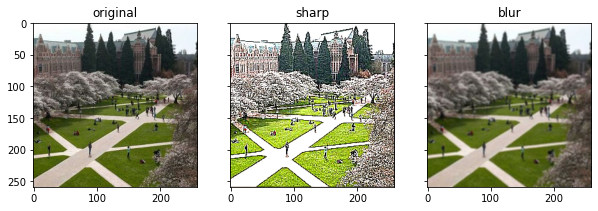

In [40]:
from PIL import ImageFilter

sharp = ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 10, -1, -1, -1, -1), 1, 0)
im_sharp = im_na.filter(sharp)

blur = ImageFilter.Kernel((3, 3), (1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9, 1/9), 1, 0)
im_blur = im_na.filter(blur)

fig, ax = plt.subplots(1, 3, figsize = (10, 10), sharey = True)
ax[0].imshow(im_na)
ax[1].imshow(im_sharp)
ax[2].imshow(im_blur)
ax[0].set_title('original')
ax[1].set_title('sharp')
ax[2].set_title('blur')
fig.savefig("filtered_img.png")
plt.show()

### Finding Edges

#### Laplacian Filter

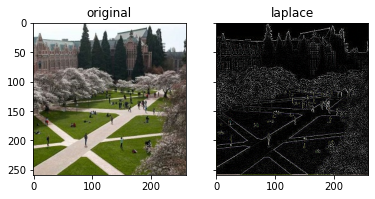

In [41]:
laplace = ImageFilter.Kernel((3, 3), (0, 1, 0, 1, -4, 1, 0, 1, 0), 1, 0)

im_l = im_na.filter(laplace) 

fig, ax = plt.subplots(1, 2, sharey = True)
ax[0].imshow(im_na)
ax[1].imshow(im_l)
ax[0].set_title('original')
ax[1].set_title('laplace')
fig.savefig("laplace_img.png")
plt.show()

#### Sobel Filter

1. First we apply two separate ones: vertical **v** and horizontal **h**. 

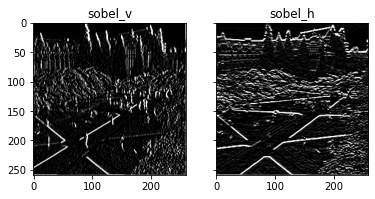

In [42]:
sobel_v = ImageFilter.Kernel((3, 3), (-1, 0, 1, -2, 0, 2, -1, 0, 1), 1, 0)
sobel_h = ImageFilter.Kernel((3, 3), (-1, -2, -1, 0, 0, 0, 1, 2, 1), 1, 0)

im_s_v = im_gray.filter(sobel_v) 
im_s_h = im_gray.filter(sobel_h)

fig, ax = plt.subplots(1, 2, sharey = True)
ax[0].imshow(im_s_v, cmap = 'gray')
ax[1].imshow(im_s_h, cmap = 'gray')
ax[0].set_title('sobel_v')
ax[1].set_title('sobel_h')
fig.savefig("sobel_img.png")
plt.show()

2. Then we combine them together by calculating the magnitude in each pixel `sqrt(v^2 + h^2)`. The arrays need to be converted to **float** type before calculations, and then the normalization and conformation of data type for image array should also be done.

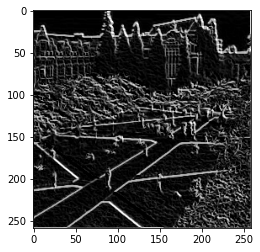

In [43]:
im_s_h_f = array(im_s_h).astype(float) 
im_s_v_f = array(im_s_v).astype(float)
im_s_mag = np.sqrt(np.square(im_s_h_f) + np.square(im_s_v_f))
im_s = (255 * im_s_mag / im_s_mag.max()).astype(uint8)

plt.figure()
imshow(im_s, cmap = 'gray')
plt.savefig("sobel.png")
plt.show()

## Pooling

We use `block_reduce(image, block_size, func)` for pooling. The parameters are:

* **image** - image in array format.
* **block_size** - array containing down-sampling integer factor along each axis.
* **func** - calculate the return value for each local block. Primary functions are `numpy.sum, numpy.min, numpy.max, numpy.mean, numpy.median`

In [44]:
from skimage.measure import block_reduce

im_max_pool = block_reduce(im_m, block_size = (6, 6, 1), func = np.max)
im_avg_pool = block_reduce(im_m, block_size = (6, 6, 1), func = np.mean).astype(uint8)

print(im_m.shape)
print(im_max_pool.shape)
print(im_avg_pool.shape)

(259, 259, 3)
(44, 44, 3)
(44, 44, 3)


Plot the images after pooling

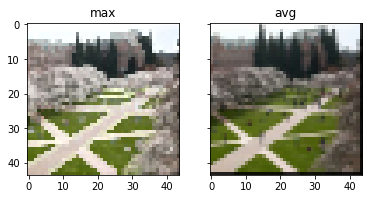

In [45]:
fig, ax = plt.subplots(1, 2, sharey = True)
ax[0].imshow(im_max_pool)
ax[1].imshow(im_avg_pool)
ax[0].set_title('max')
ax[1].set_title('avg')
plt.savefig("pooling.png")
plt.show()